In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
df = pd.read_csv("VIX2.csv")

In [3]:
df.size

1757

In [4]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df = df.set_index(['Date'], drop=True)

In [7]:
df.head(10)


,Adj Close
Date,
2018-04-27,15.41
2018-04-30,15.93
2018-05-01,15.49
2018-05-02,15.97
2018-05-03,15.90
2018-05-04,14.77
2018-05-07,14.75
2018-05-08,14.71
2018-05-09,13.42


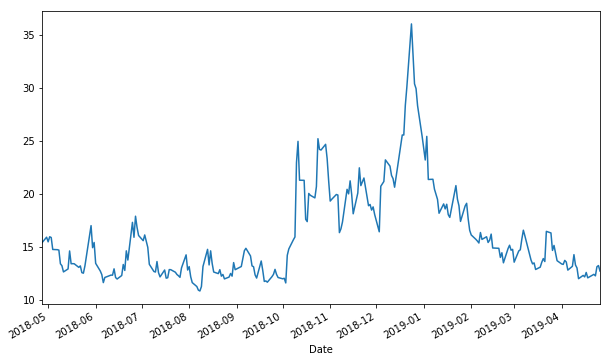

In [8]:
plt.figure(figsize=(10, 6))
df['Adj Close'].plot();

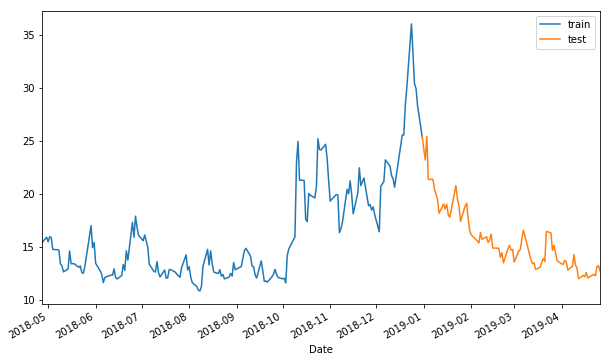

In [9]:
split_date = pd.Timestamp('2018-12-31')
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [10]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1, 1))
test_sc = scaler.transform(test.values.reshape(-1, 1))

In [11]:
X_train = train_sc[:-1] # All but last value
y_train = train_sc[1:] # All but first value
X_test = test_sc[:-1] # All but last value
y_test = test_sc[1:] # All but first value

In [31]:
X_train

array([[-0.63838224],
       [-0.59714512],
       [-0.63203807],
       [-0.59397304],
       [-0.59952419],
       [-0.68913561],
       [-0.69072165],
       [-0.69389374],
       [-0.7961935 ],
       [-0.8112609 ],
       [-0.85725615],
       [-0.83505155],
       [-0.70023791],
       [-0.7961935 ],
       [-0.79540048],
       [-0.7961935 ],
       [-0.82315623],
       [-0.81205393],
       [-0.8628073 ],
       [-0.8667724 ],
       [-0.81205393],
       [-0.51070579],
       [-0.67565424],
       [-0.63679619],
       [-0.79302141],
       [-0.85011895],
       [-0.87708168],
       [-0.93735131],
       [-0.89849326],
       [-0.89452815],
       [-0.88104679],
       [-0.88183981],
       [-0.83425852],
       [-0.89928628],
       [-0.91038858],
       [-0.88421887],
       [-0.80174465],
       [-0.84615385],
       [-0.69944489],
       [-0.76843775],
       [-0.48612213],
       [-0.59793814],
       [-0.44012688],
       [-0.52418715],
       [-0.58445678],
       [-0

In [12]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0845
Epoch 2/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0208
Epoch 3/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 4/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 5/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 6/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 7/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 8/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 9/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 10/100
170/170 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 11/100
170/170 [==============================] - 0s 

In [13]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.879
The R2 score on the Test set is:	0.776


In [14]:
a = list(range(1, 10))

In [15]:
a

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
a[:-1]

[1, 2, 3, 4, 5, 6, 7, 8]

In [17]:
a[1:]

[2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
a[:-2]

[1, 2, 3, 4, 5, 6, 7]

# LSTM

In [19]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

In [20]:
train_sc_df.head(10)

,Y
Date,
2018-04-27,-0.638382
2018-04-30,-0.597145
2018-05-01,-0.632038
2018-05-02,-0.593973
2018-05-03,-0.599524
2018-05-04,-0.689136
2018-05-07,-0.690722
2018-05-08,-0.693894
2018-05-09,-0.796193


In [21]:
for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

In [22]:
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [23]:
X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [24]:
X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
170/170 [==============================] - 3s 15ms/step - loss: 0.1660
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0414
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0317
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0293
Epoch 5/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0275
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0261
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0251
Epoch 8/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0242
Epoch 9/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0236
Epoch 10/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0231
Epoch 11/100
170/170 [==============================] - 1s 5ms/step - loss: 0.0227
Epoch 12/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0223
Epoch 13/100

170/170 [==============================] - 1s 5ms/step - loss: 0.0146
Epoch 100/100
170/170 [==============================] - 1s 5ms/step - loss: 0.0146


In [26]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.870
The R2 score on the Test set is:	0.768


In [27]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

80/80 [==============================] - 0s 5ms/step
NN: 0.010967
LSTM: 0.011365


# Make predictions

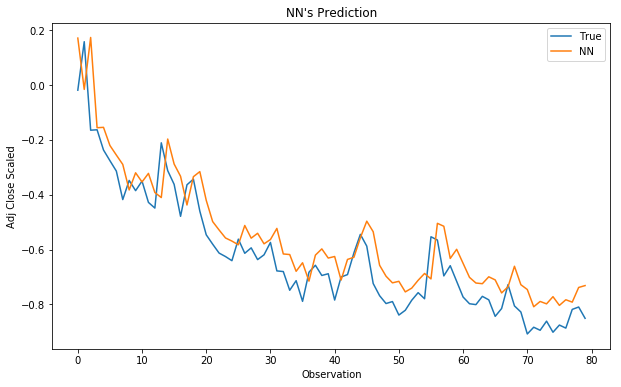

In [29]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

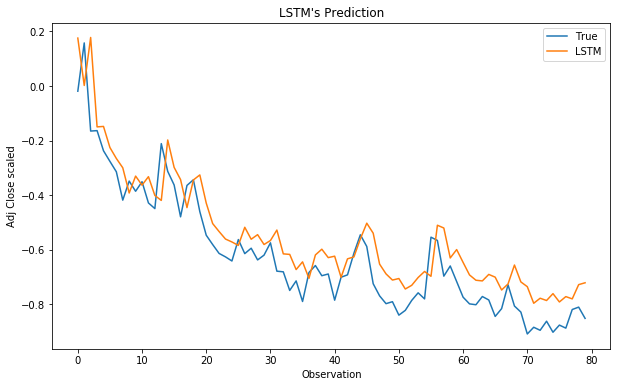

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();